# Python matplotlib plotting exercises

![](but_it_runs.jpg)

In [1]:
# regular imports
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# to display the figures in the notebook
%matplotlib inline

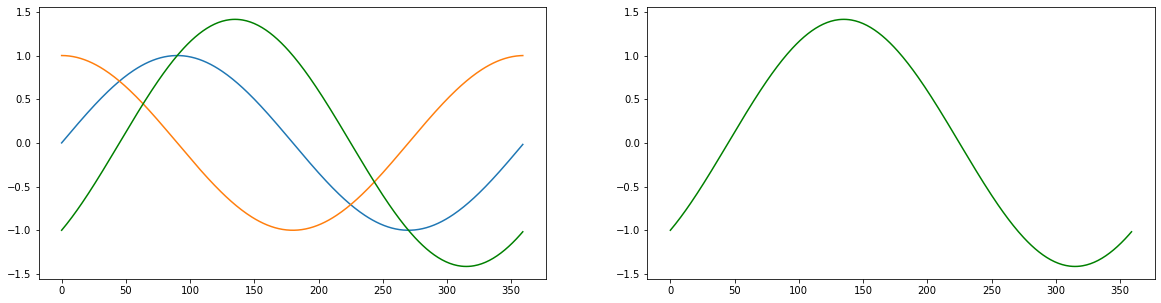

In [2]:
# make some data
x = np.deg2rad(np.arange(0,360))
y = np.sin(x)
z = np.cos(x)
t = y - z

# plot a figure
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(np.rad2deg(x),y); ax1.plot(np.rad2deg(x),z)
ax1.plot(np.rad2deg(x),t, c='g'); ax2.plot(np.rad2deg(x),t, c='g');

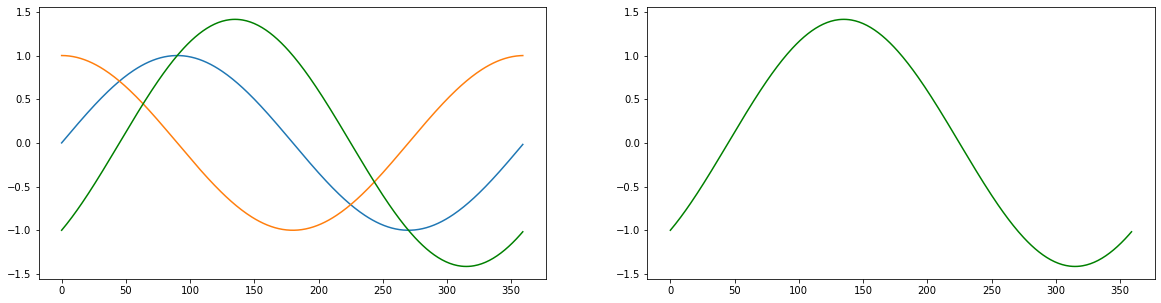

In [3]:
# alternatively 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].plot(np.rad2deg(x),y); axes[0].plot(np.rad2deg(x),z)
axes[0].plot(np.rad2deg(x),t, c='g'); axes[1].plot(np.rad2deg(x),t, c='g');

### Matplotlib rc parameters <br>
Also see ; https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [4]:
# take the default parameters
IPython_default = plt.rcParams.copy()
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [5]:
# plt.rcParams['axes.prop_cycle']

In [23]:
plt.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['r','b','g'])
# plt.rcParams.update(IPython_default)

In [7]:
# alternatively, the rc parameters can also be changed by the following
plt.rc('xtick', direction='out', color='red')
plt.rc('ytick', direction='out', color='blue')

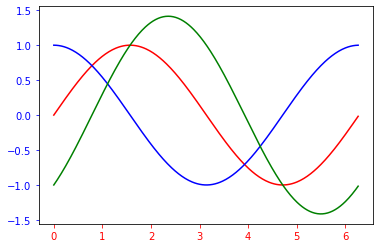

In [8]:
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,t)

#### We can also use existing styles

In [9]:
plt.style.available[:5], len(plt.style.available)

(['Solarize_Light2',
  '_classic_test_patch',
  'bmh',
  'classic',
  'dark_background'],
 26)

In [10]:
x = np.linspace(1,5, 100)
y = np.linspace(1,5, 50)
# generate 2 2d grids for the x & y bounds
yy, xx = np.meshgrid(x,y)
z = np.sin(xx)**10 + np.cos(10 + yy*xx) * np.cos(xx)

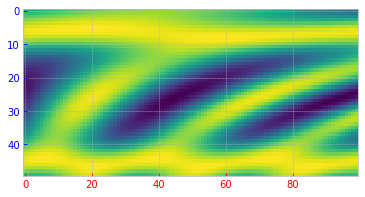

In [11]:
with plt.style.context('bmh'):
    plt.imshow(z);

In [12]:
styles = iter(plt.style.available)

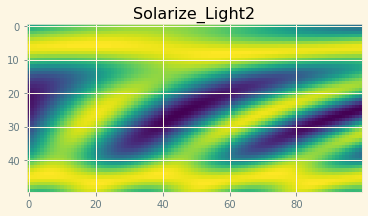

In [13]:
curr_style = next(styles)

with plt.style.context(curr_style):
    plt.imshow(z);
    plt.title(curr_style)

Furthermore, we can even combine or take one style and adjust

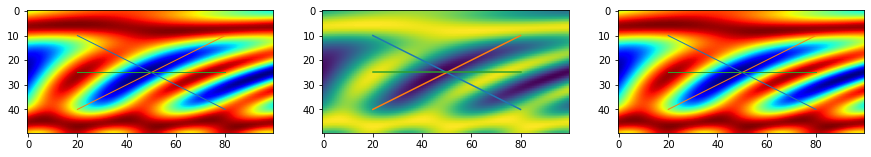

In [21]:
plt.rcParams.update(IPython_default)

fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
with plt.style.context(['classic']):
    ax[0].imshow(z);
    ax[0].plot(np.linspace(20,80,50), np.linspace(10,40,50))
    ax[0].plot(np.linspace(20,80,50), np.linspace(40,10,50))
    ax[0].plot(np.linspace(20,80,50), np.repeat(25,50))
    
with plt.style.context(['dark_background']):
    ax[1].imshow(z);
    ax[1].plot(np.linspace(20,80,50), np.linspace(10,40,50))
    ax[1].plot(np.linspace(20,80,50), np.linspace(40,10,50))
    ax[1].plot(np.linspace(20,80,50), np.repeat(25,50))

with plt.style.context(['dark_background','classic']):
    ax[2].imshow(z);
    ax[2].plot(np.linspace(20,80,50), np.linspace(10,40,50))
    ax[2].plot(np.linspace(20,80,50), np.linspace(40,10,50))
    ax[2].plot(np.linspace(20,80,50), np.repeat(25,50))

Let's make this a little more reproducable

In [46]:
def plot_dummy(ax=None, default=False):
    if default:
        plt.rcParams.update(IPython_default)
    # create data
    x = np.linspace(1,5, 100)
    y = np.linspace(1,5, 50)
    yy, xx = np.meshgrid(x,y)
    z = np.sin(xx)**10 + np.cos(10 + yy*xx) * np.cos(xx)
    # plot these
    ax = ax or plt.gca()
    ax.imshow(z);
    ax.plot(np.linspace(20,80,50), np.linspace(10,40,50))
    ax.plot(np.linspace(20,80,50), np.linspace(40,10,50))
    ax.plot(np.linspace(20,80,50), np.repeat(25,50))
    markers = iter(['o','3','X','+','^'])
    for i in range(5):
        xr = np.random.uniform(10,90,40)
        yr = np.random.uniform(10,40,40)
        ax.scatter(xr,yr, s=np.random.randint(20,70,40), marker=next(markers))

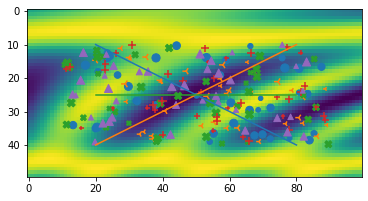

In [47]:
plot_dummy()

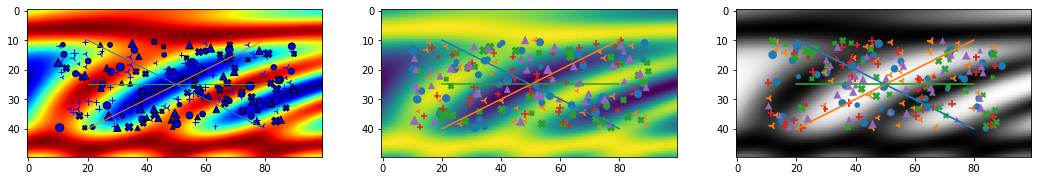

In [51]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(18,8))
with plt.style.context(['classic']):
    plot_dummy(ax[0])
    
with plt.style.context(['dark_background']):
    plot_dummy(ax[1])
    
with plt.style.context(['seaborn']):
    plot_dummy(ax[2])

# Lets make everything more modular

See ```matplotlib_params.py```

In [1]:
import matplotlib_params as mplRC

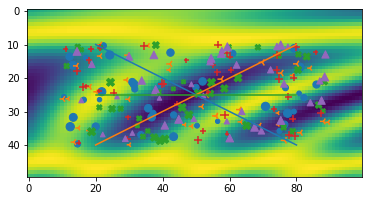

In [2]:
mplRC.plot_dummy()

In [3]:
mplRC.set_my_params()

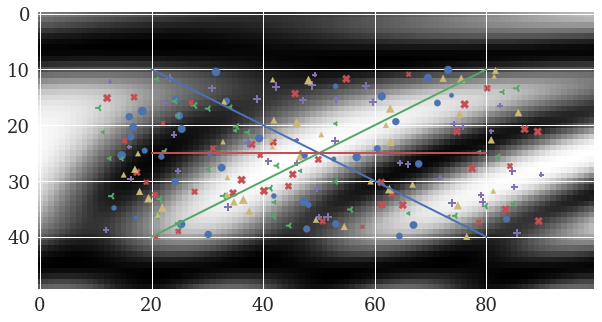

In [4]:
mplRC.plot_dummy()